# Early Stage Diabetes Risk Prediction Dataset

Dataset Link : https://archive.ics.uci.edu/ml/datasets/Early+stage+diabetes+risk+prediction+dataset.#

References : https://link.springer.com/chapter/10.1007/978-981-13-8798-2_12

In [15]:
# Diabetes is one of the fastest growing chronic life threatening diseases that have already affected 422 million people 
# worldwide according to the report of World Health Organization (WHO), in 2018. Due to the presence of a relatively long 
# asymptomatic phase, early detection of diabetes is always desired for a clinically meaningful outcome. Around 50% of all 
# people suffering from diabetes are undiagnosed because of its long-term asymptomatic phase. The early diagnosis of diabetes 
# is only possible by proper assessment of both common and less common sign symptoms, which could be found in different 
# phases from disease initiation up to diagnosis. Data mining classification techniques have been well accepted by researchers
# for risk prediction model of the disease. To predict the likelihood of having diabetes requires a dataset, which contains 
# the data of newly diabetic or would be diabetic patient. In this work, we have used such a dataset of 520 instances, which
# has been collected using direct questionnaires from the patients of Sylhet Diabetes Hospital in Sylhet, Bangladesh. We have
# analyzed the dataset with Naive Bayes Algorithm, Logistic Regression Algorithm, and Random Forest Algorithm and after 
# applying tenfold Cross- Validation and Percentage Split evaluation techniques, Random forest has been found having best 
# accuracy on this dataset. Finally, a commonly accessible, user-friendly tool for the end user to check the risk of having 
# diabetes from assessing the symptoms and useful tips to control over the risk factors has been proposed.

In [16]:
# Attribute Information:

# Age : 20-65 yrs
# Sex : Male/ Female
# Polyuria : Excessive urination 
# Polydipsia :Excess Thirst
# Sudden Weight Loss : Sudden loss in weight
# Weakness : Feeling of weakness
# Polyphagia : Excessive eating
# Genital Thrush : A yeast infection near the genital regions
# Visual Blurring : Blurred vision
# Itching : Itching sensation
# Irritability : Irritation in mood
# Delayed Healing : Delayed healing of wounds
# Partial Paresis : Weakening of muscles or group of muscles
# Muscle Stiffness :  Stiff muscles
# Alopecia : Hairloss
# Obesity : Excessive body fat
# Class : Positive/ Negative

In [17]:
# importing the required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings(action = 'ignore')
from sklearn.metrics import classification_report, confusion_matrix, cohen_kappa_score, roc_auc_score, roc_curve

In [18]:
# Loading the dataset

df = pd.read_csv('diabetes_data_upload.csv')

In [19]:
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [20]:
df.shape

# There are 520 rows and 17 columns in the datset.

(520, 17)

In [21]:
df.info()

# Age column is numerical, rest all columns are categorical.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

In [8]:
df.describe()

,Age
count,520.000000
mean,48.028846
std,12.151466
min,16.000000
25%,39.000000
50%,47.500000
75%,57.000000
max,90.000000


In [9]:
df.isnull().sum()

# There are no null values in the dataset.

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

In [10]:
# Understanding the distribution of the Target Column

df['class'].value_counts(normalize = True)*100

Positive    61.538462
Negative    38.461538
Name: class, dtype: float64

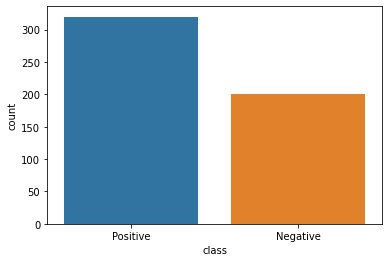

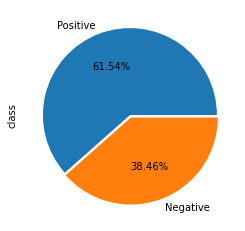

In [31]:
sns.countplot(df['class'])
plt.show()

df['class'].value_counts(normalize = True).plot(kind = 'pie', autopct = '%0.2f%%', explode = [0, 0.03])
plt.show()

# The dataset is fairly balanced.

In [39]:
X = df.drop('class', axis = 1)

In [40]:
X = pd.get_dummies(X, drop_first = True)
y = df['class'].replace({'Negative' : 0, 'Positive' : 1})

In [46]:
# Train-Test Split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10, test_size = 0.2)

In [ ]:
# Fitting Base Models

In [44]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, f1_score

In [48]:
# Logistic Regression

import statsmodels.api as sm

logreg = sm.Logit(y_train, sm.add_constant(X_train)).fit()
print(logreg.summary())

Optimization terminated successfully.
         Current function value: 0.179898
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                  class   No. Observations:                  416
Model:                          Logit   Df Residuals:                      399
Method:                           MLE   Df Model:                           16
Date:                Wed, 25 May 2022   Pseudo R-squ.:                  0.7281
Time:                        18:12:59   Log-Likelihood:                -74.838
converged:                       True   LL-Null:                       -275.21
Covariance Type:            nonrobust   LLR p-value:                 2.541e-75
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      2.0793      1.064      1.954      0.051      -0.007      

In [ ]:
# From the LLR p-value from the above summary, we can see that the model is significant.
# From the p-values fro different variables, we can understand which all variables are significant.

In [78]:
features = X_train.columns.tolist()
features.insert(0, 'Constant')

['Constant',
 'Age',
 'Gender_Male',
 'Polyuria_Yes',
 'Polydipsia_Yes',
 'sudden weight loss_Yes',
 'weakness_Yes',
 'Polyphagia_Yes',
 'Genital thrush_Yes',
 'visual blurring_Yes',
 'Itching_Yes',
 'Irritability_Yes',
 'delayed healing_Yes',
 'partial paresis_Yes',
 'muscle stiffness_Yes',
 'Alopecia_Yes',
 'Obesity_Yes']

In [85]:
df_pvalues = pd.DataFrame()
df_pvalues['Features'] = features
df_pvalues['P_Values'] = logreg.pvalues.values.tolist()
signi_var = df_pvalues[df_pvalues['P_Values'] < 0.05]['Features'].tolist()
signi_var

# Folowing are the variables which are significant.

['Gender_Male',
 'Polyuria_Yes',
 'Polydipsia_Yes',
 'Genital thrush_Yes',
 'Itching_Yes',
 'Irritability_Yes',
 'partial paresis_Yes']

In [87]:
# We will experiment building the model using the significant variables only.

logreg = sm.Logit(y_train, sm.add_constant(X_train[signi_var])).fit()
print(logreg.summary())

Optimization terminated successfully.
         Current function value: 0.191738
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                  class   No. Observations:                  416
Model:                          Logit   Df Residuals:                      408
Method:                           MLE   Df Model:                            7
Date:                Wed, 25 May 2022   Pseudo R-squ.:                  0.7102
Time:                        18:21:45   Log-Likelihood:                -79.763
converged:                       True   LL-Null:                       -275.21
Covariance Type:            nonrobust   LLR p-value:                 2.138e-80
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   1.0959      0.450      2.437      0.015       0.215       1.977
Ge

In [ ]:
# From the model summary, we can see that all the variables are significant.

              precision    recall  f1-score   support

           0       0.97      0.89      0.93        44
           1       0.92      0.98      0.95        60

    accuracy                           0.94       104
   macro avg       0.95      0.93      0.94       104
weighted avg       0.94      0.94      0.94       104



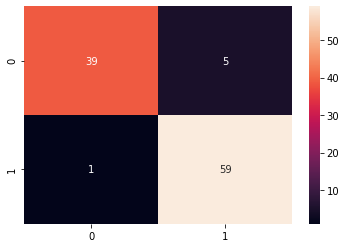

In [89]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

logreg.fit(X_train, y_train)

y_test_pred = logreg.predict(X_test)

y_pred = logreg.predict(X_test)

print(classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot = True)
plt.show()

# Using the above approach, we are getting good results.
# We will experiment with other approaches as well.

In [90]:
# Finding the best cutoff value

# using best F1 score method
y_test_prob = logreg.predict_proba(X_test)
f1_list = []
for th in np.arange(0.1, 1, 0.1):
    y_test_pred = [0 if pval < th else 1 for pval in y_test_prob[:, 1]]
    f1_list.append(f1_score(y_test, y_test_pred))

th_df = pd.DataFrame({'Threshold': np.arange(0.1, 1, 0.1), 'F1': f1_list})
th_df[th_df['F1'] == max(th_df['F1'])]

,Threshold,F1
5,0.6,0.957983


              precision    recall  f1-score   support

           0       0.93      0.95      0.94        44
           1       0.97      0.95      0.96        60

    accuracy                           0.95       104
   macro avg       0.95      0.95      0.95       104
weighted avg       0.95      0.95      0.95       104



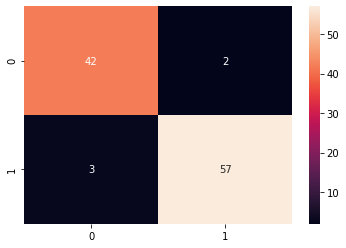

In [93]:
y_pred = [0 if pval < 0.6 else 1 for pval in y_test_prob[:, 1]]

print(classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot = True)
plt.show()

In [ ]:
# Results have improved using threshold = 0.6.

In [91]:
# Youden's Index method

fpr,tpr,th = roc_curve(y_test,y_test_prob[:,1])
roc_df = pd.DataFrame({'FPR':fpr,'TPR':tpr,'Threshold':th})
roc_df['Younden_Ind'] = roc_df['TPR']-roc_df['FPR']
roc_df[roc_df['Younden_Ind']==max(roc_df['Younden_Ind'])]

,FPR,TPR,Threshold,Younden_Ind
21,0.045455,0.983333,0.558349,0.937879


              precision    recall  f1-score   support

           0       0.98      0.95      0.97        44
           1       0.97      0.98      0.98        60

    accuracy                           0.97       104
   macro avg       0.97      0.97      0.97       104
weighted avg       0.97      0.97      0.97       104



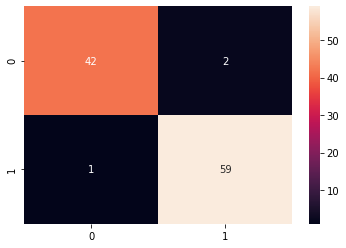

In [94]:
y_pred = [0 if pval < 0.558349 else 1 for pval in y_test_prob[:, 1]]

print(classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot = True)
plt.show()

In [ ]:
# Using threshold = 0.558, we are getting very good results.
# We will experiment with other approaches as well.

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        44
           1       1.00      0.98      0.99        60

    accuracy                           0.99       104
   macro avg       0.99      0.99      0.99       104
weighted avg       0.99      0.99      0.99       104



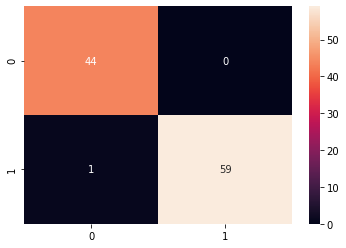

In [95]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
model_dt = dt.fit(X_train, y_train)

y_pred = model_dt.predict(X_test)

print(classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot = True)
plt.show()

In [ ]:
# We are getting very good results using Decision Tree Classifier.

In [99]:
dt_df = pd.DataFrame()
dt_df['Features'] = X_train.columns
dt_df['Importance'] = model_dt.feature_importances_
dt_df[dt_df['Importance'] > 0].sort_values(by = 'Importance', ascending = False)

,Features,Importance
2,Polyuria_Yes,0.436281
3,Polydipsia_Yes,0.107918
1,Gender_Male,0.103871
0,Age,0.075769
13,muscle stiffness_Yes,0.075337
14,Alopecia_Yes,0.050974
4,sudden weight loss_Yes,0.038291
11,delayed healing_Yes,0.037133
10,Irritability_Yes,0.026938
7,Genital thrush_Yes,0.015385


              precision    recall  f1-score   support

           0       0.98      1.00      0.99        44
           1       1.00      0.98      0.99        60

    accuracy                           0.99       104
   macro avg       0.99      0.99      0.99       104
weighted avg       0.99      0.99      0.99       104



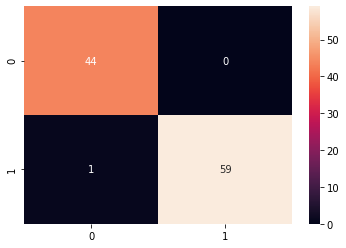

In [101]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
model_rf = rf.fit(X_train, y_train)

y_pred = model_rf.predict(X_test)

print(classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot = True)
plt.show()

In [ ]:
# We are getting almost perfect results using Random Forest Classifier.

In [103]:
rf_df = pd.DataFrame()
rf_df['Features'] = X_train.columns
rf_df['Importance'] = model_rf.feature_importances_
rf_df[rf_df['Importance'] > 0].sort_values(by = 'Importance', ascending = False)

# Random Forest Classifier is giving adequate importance to majority of the attributes to make the predictions.

,Features,Importance
2,Polyuria_Yes,0.214898
3,Polydipsia_Yes,0.192590
0,Age,0.103560
1,Gender_Male,0.090889
4,sudden weight loss_Yes,0.057933
12,partial paresis_Yes,0.051729
10,Irritability_Yes,0.042588
14,Alopecia_Yes,0.040114
11,delayed healing_Yes,0.035873
9,Itching_Yes,0.029148


              precision    recall  f1-score   support

           0       0.91      0.89      0.90        44
           1       0.92      0.93      0.93        60

    accuracy                           0.91       104
   macro avg       0.91      0.91      0.91       104
weighted avg       0.91      0.91      0.91       104



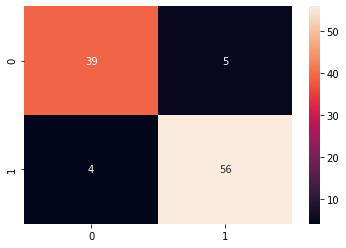

In [104]:
# AdaBoost 

from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
model_ada = ada.fit(X_train, y_train)

y_pred = model_ada.predict(X_test)

print(classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot = True)
plt.show()

In [ ]:
# We are getting good results using AdaBoost Classifier.

In [106]:
ada_df = pd.DataFrame()
ada_df['Features'] = X_train.columns
ada_df['Importance'] = model_ada.feature_importances_
ada_df[rf_df['Importance'] > 0].sort_values(by = 'Importance', ascending = False)

# AdaBoost Classifier is giving adequate importance to majority of the attributes to make the predictions.

,Features,Importance
0,Age,0.52
9,Itching_Yes,0.08
1,Gender_Male,0.06
2,Polyuria_Yes,0.06
3,Polydipsia_Yes,0.06
10,Irritability_Yes,0.06
6,Polyphagia_Yes,0.04
12,partial paresis_Yes,0.04
4,sudden weight loss_Yes,0.02
5,weakness_Yes,0.02


[19:33:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        44
           1       1.00      0.98      0.99        60

    accuracy                           0.99       104
   macro avg       0.99      0.99      0.99       104
weighted avg       0.99      0.99      0.99       104



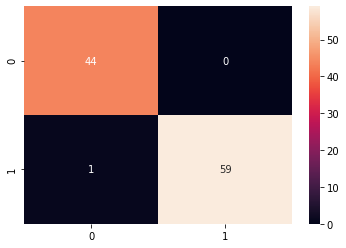

In [107]:
# XGBoost

import xgboost
from xgboost import XGBClassifier

xgb = XGBClassifier()
model_xgb = xgb.fit(X_train, y_train)

y_pred = model_xgb.predict(X_test)

print(classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot = True)
plt.show()

In [ ]:
# We are getting almost perfect results using XGBoost Classifier.

In [113]:
xgb_df = pd.DataFrame()
xgb_df['Features'] = X_train.columns
xgb_df['Importance'] = model_xgb.feature_importances_
xgb_df[rf_df['Importance'] > 0].sort_values(by = 'Importance', ascending = False)

# XGBoost Classifier is giving adequate importance to majority of the attributes to make the predictions.

,Features,Importance
2,Polyuria_Yes,0.452719
3,Polydipsia_Yes,0.107814
1,Gender_Male,0.077241
14,Alopecia_Yes,0.050676
10,Irritability_Yes,0.044830
15,Obesity_Yes,0.039621
4,sudden weight loss_Yes,0.035571
11,delayed healing_Yes,0.034256
8,visual blurring_Yes,0.031130
13,muscle stiffness_Yes,0.027749


In [ ]:
# We consider the XGBoost model as our final model as it is giving the best results.

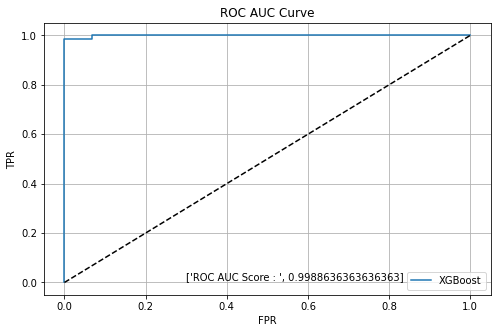

In [117]:
y_pred_prob = model_xgb.predict_proba(X_test)

fpr, tpr, th = roc_curve(y_test, y_pred_prob[:, 1])

plt.figure(figsize = (8,5))
plt.plot(fpr, tpr, label = 'XGBoost')
plt.plot([0,1], [0,1], '--k')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC AUC Curve')
plt.text(0.3, 0.01, s = ['ROC AUC Score : ', roc_auc_score(y_test, y_pred_prob[:, 1])])
plt.legend()
plt.grid()
plt.show()

In [ ]:
# ROC = 1

In [116]:
Kappa_Score = cohen_kappa_score(y_test, y_pred)
Kappa_Score

# Kappa Score = 1 which signifies that the predictions are near perfect.

0.9407294832826748